<a href="https://colab.research.google.com/github/pooja-parsana/bike_sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing libraries**

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

import warnings 
warnings.filterwarnings('ignore')

**Mount the drive and loading dataset from drive**

In [ ]:
#importing csv file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path of dataset and data frame
path='/content/drive/MyDrive/AlmaBetter/Cohort Rimo/capstone project 2/SeoulBikeData.csv'
dataframe=pd.read_csv(path, encoding='ISO-8859-1')

In [ ]:
#creating copy of data frame
df=dataframe.copy()

In [ ]:
#renaming columns
df.rename(columns={'Rented Bike Count': 'RentedBikeCount','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility',
 'Dew point temperature(°C)': 'DewPointTemperature', 'Solar Radiation (MJ/m2)':'SolarRadiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
 'Functioning Day':'FunctioningDay','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

# **Understand more about the data**

**Date** : The date of the day,in formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float

**Visibility (10m)**: Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: Season of the year, type : str, there are only 4 season's in data .

**Holiday**: If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

In [ ]:
#display first 10 rows
df.head(10)

,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#disply last five rows 
df.tail()

,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# to get datatypes of each columns
df.dtypes

Date                    object
RentedBikeCount          int64
Hour                     int64
Temperature            float64
Humidity                 int64
WindSpeed              float64
Visibility               int64
DewPointTemperature    float64
SolarRadiation         float64
Rainfall               float64
Snowfall               float64
Seasons                 object
Holiday                 object
FunctioningDay          object
dtype: object

In [ ]:
#displaying name of columns
df.columns

Index(['Date', 'RentedBikeCount', 'Hour', 'Temperature', 'Humidity',
       'WindSpeed', 'Visibility', 'DewPointTemperature', 'SolarRadiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'FunctioningDay'],
      dtype='object')

In [ ]:
#checking some statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RentedBikeCount,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
WindSpeed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
DewPointTemperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
SolarRadiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 8760 non-null   object 
 1   RentedBikeCount      8760 non-null   int64  
 2   Hour                 8760 non-null   int64  
 3   Temperature          8760 non-null   float64
 4   Humidity             8760 non-null   int64  
 5   WindSpeed            8760 non-null   float64
 6   Visibility           8760 non-null   int64  
 7   DewPointTemperature  8760 non-null   float64
 8   SolarRadiation       8760 non-null   float64
 9   Rainfall             8760 non-null   float64
 10  Snowfall             8760 non-null   float64
 11  Seasons              8760 non-null   object 
 12  Holiday              8760 non-null   object 
 13  FunctioningDay       8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
len(df.Date.unique())

365

# **Handling missing values**

**Why do we need to handle missing value?** 

Missing data treatment is very important to avoid biased results. Generally, missing data in training data set can reduce the power of the model which can lead to wrong classification/ prediction.

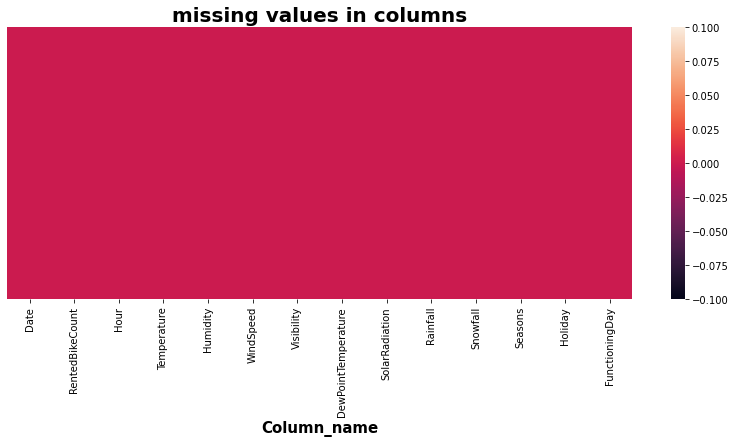

In [ ]:
#checkig for missing values
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(),cbar=True, yticklabels=False)
plt.xlabel("Column_name",size=15,weight='bold')
plt.title("missing values in columns",fontweight='bold',size=20)
plt.show()

It seems that there is no missing values present  in dataset.

In [ ]:
# checking for null values
df.isnull().sum()

Date                   0
RentedBikeCount        0
Hour                   0
Temperature            0
Humidity               0
WindSpeed              0
Visibility             0
DewPointTemperature    0
SolarRadiation         0
Rainfall               0
Snowfall               0
Seasons                0
Holiday                0
FunctioningDay         0
dtype: int64

In [ ]:
#checking for duplicate values
duplicate_value=len(df[df.duplicated()])
print(duplicate_value)

0


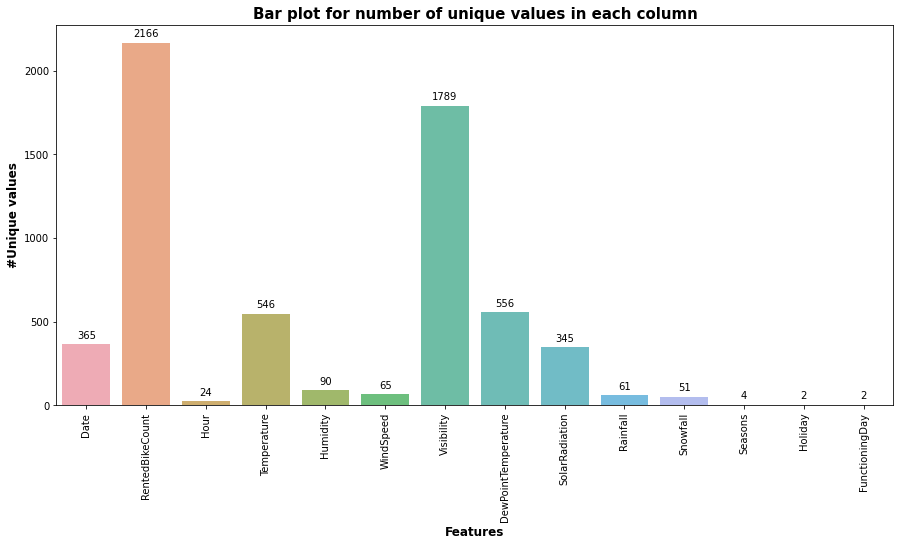

In [ ]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
df.head()

,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [ ]:
df=df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
df.head(3)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RentedBikeCount      8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   WindSpeed            8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   DewPointTemperature  8760 non-null   float64
 7   SolarRadiation       8760 non-null   float64
 8   Rainfall             8760 non-null   float64
 9   Snowfall             8760 non-null   float64
 10  Seasons              8760 non-null   object 
 11  Holiday              8760 non-null   object 
 12  FunctioningDay       8760 non-null   object 
 13  month                8760 non-null   int64  
 14  weekdays_weekend     8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
mem

# **Exploratory Data Analysis**

**Month**

Text(0.5, 1.0, 'Rented bike count vs month')

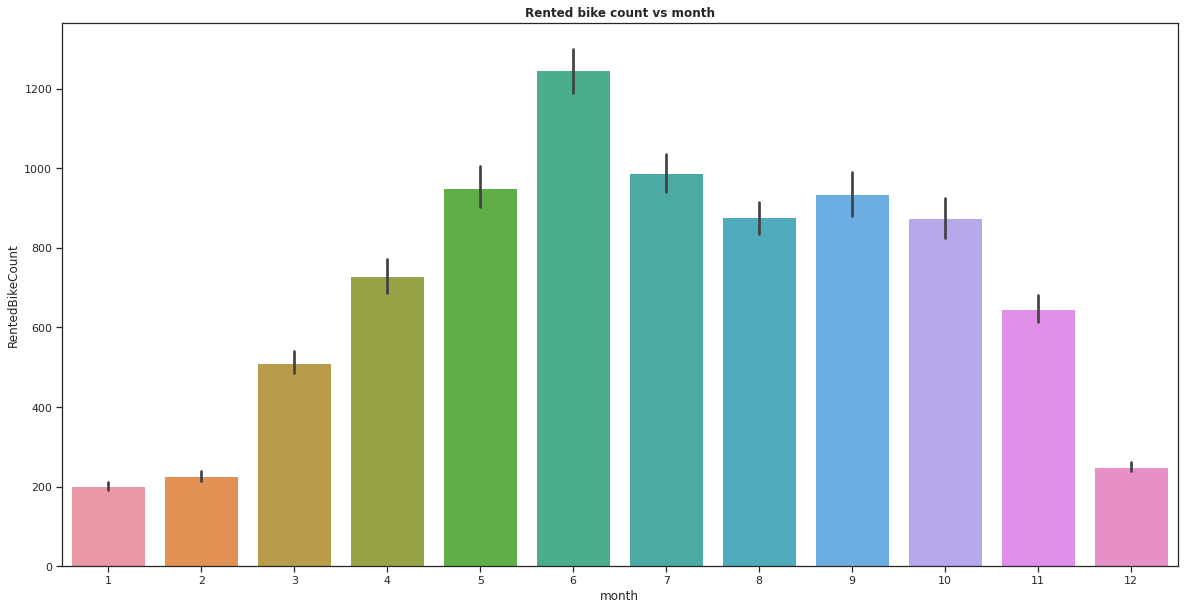

In [ ]:
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks")
sns.barplot(x='month',y='RentedBikeCount',data=df)
plt.title('Rented bike count vs month',fontweight='bold')



*   **From above graph it is clear that the from the month 5 to 10 demand was increases compared to the other month. or this is the summerr season.**



**Hour**

Text(0.5, 1.0, 'Rented bike count vs Hour')

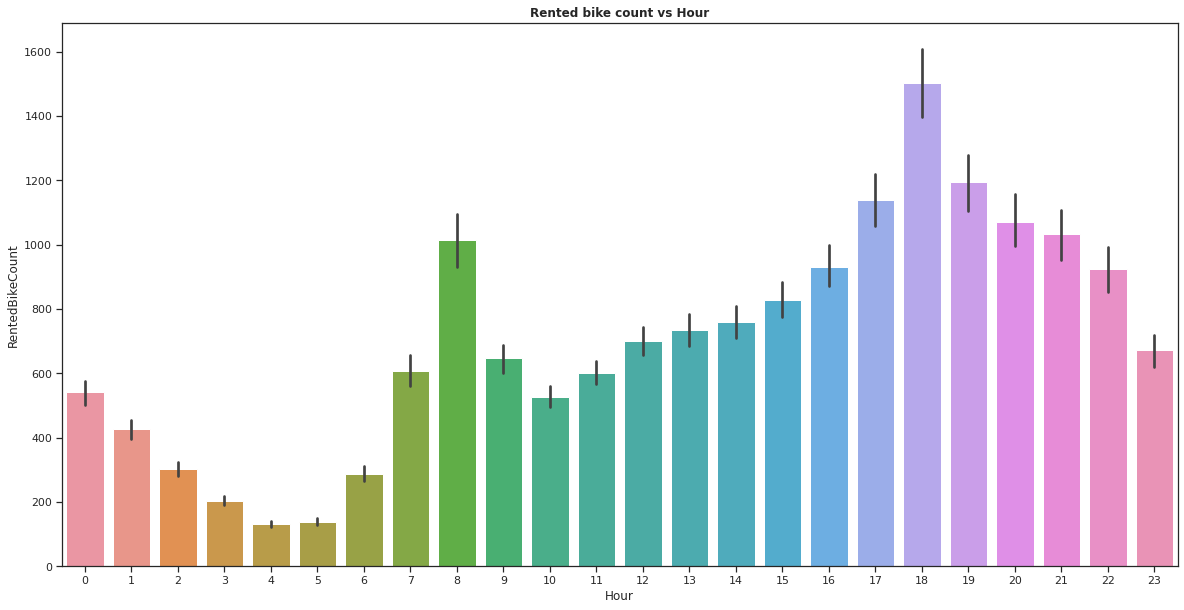

In [ ]:
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks")
sns.barplot(x='Hour',y='RentedBikeCount',data=df)
plt.title('Rented bike count vs Hour',fontweight='bold')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')

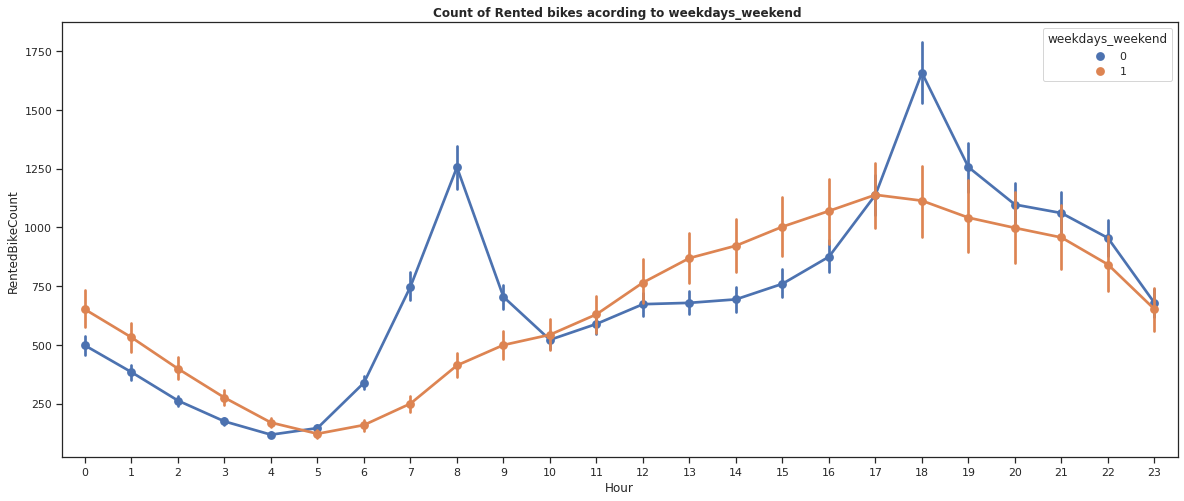

In [ ]:
plt.figure(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='RentedBikeCount',hue='weekdays_weekend')
plt.title('Count of Rented bikes acording to weekdays_weekend ',fontweight='bold')

**weekdays_weekend**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

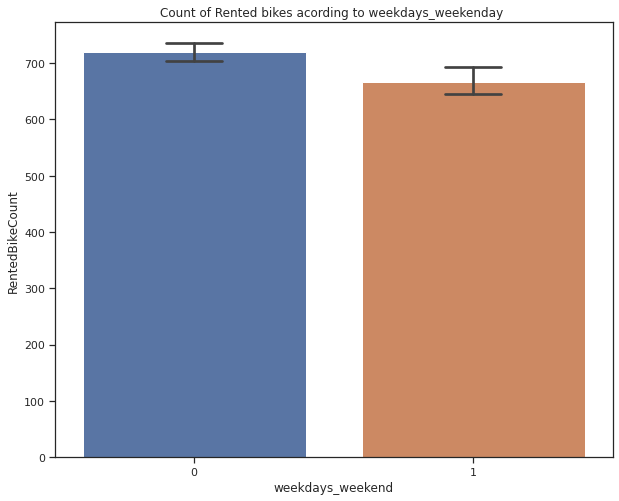

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='RentedBikeCount',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')


*   **From the first graph we can say that peak time are 7 am to 9 am and from 5 pm demand is slightly increases.** 

*   **And from above point plot its is clear that the during weak days the demand of the bike is higher beacuse of the office time.** 



**FunctioningDay**

Text(0.5, 1.0, 'Rented bike count vs Functioning day')

<Figure size 720x720 with 0 Axes>

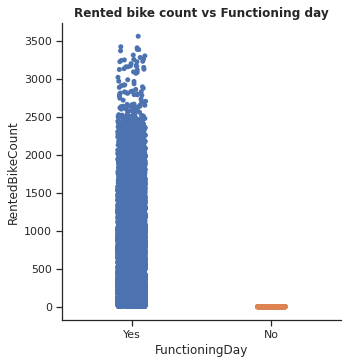

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x='FunctioningDay',y='RentedBikeCount',data=df)
plt.title('Rented bike count vs Functioning day',fontweight='bold')



*   **Above graph clearly shows that the, people don't use rented bike in no functionaning day.**


In [ ]:
df.head(1)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


**Seasons**

Text(0.5, 1.0, 'Seasons vs Rented bike Count')

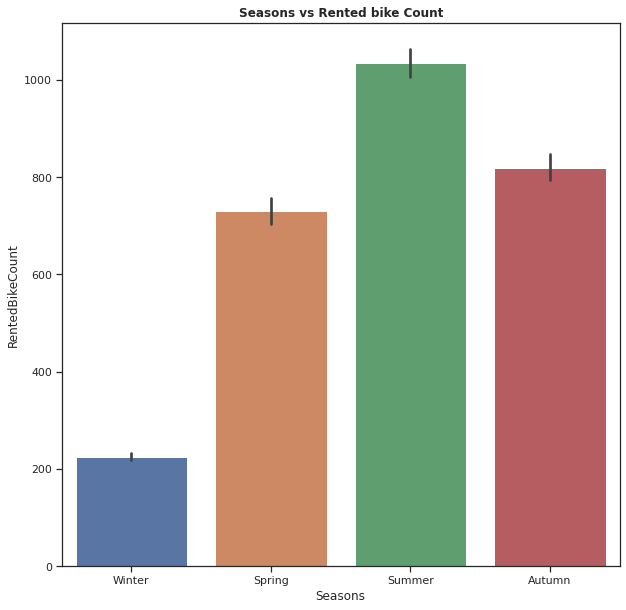

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Seasons',y='RentedBikeCount',data=df)
plt.title('Seasons vs Rented bike Count',fontweight='bold')

*   **In above graph we can see that the during summer season demand of rented bike was increase.** 

*   **And during the the winter demand is very low.**



**Holidays**

Text(0.5, 1.0, 'Holiday vs Rented bike Count')

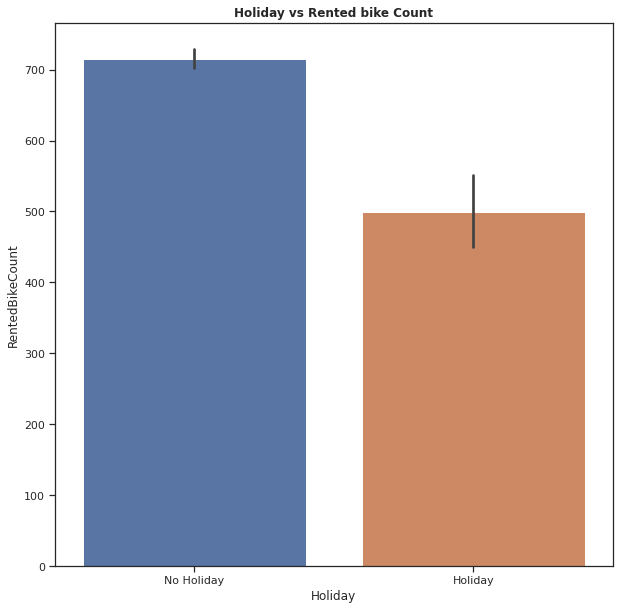

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Holiday',y='RentedBikeCount',data=df)
plt.title('Holiday vs Rented bike Count',fontweight='bold')



*   **From above graph it is clear that the during a holiday demand of rented bike was decrease compared to the no holidays.**

## **Categorical feature**

In [ ]:
cat_feature=df.select_dtypes(include='object')

In [ ]:
cat_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Seasons         8760 non-null   object
 1   Holiday         8760 non-null   object
 2   FunctioningDay  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


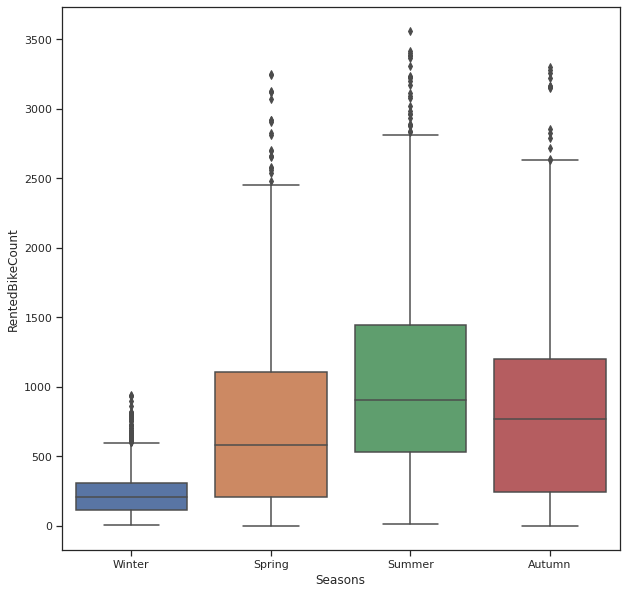

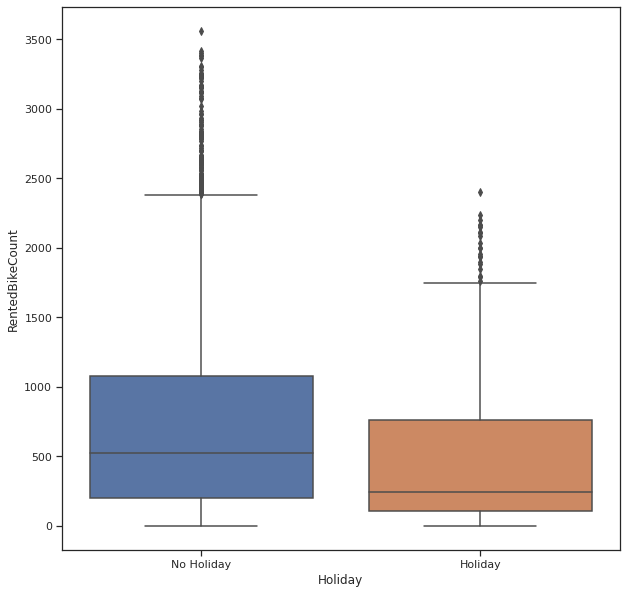

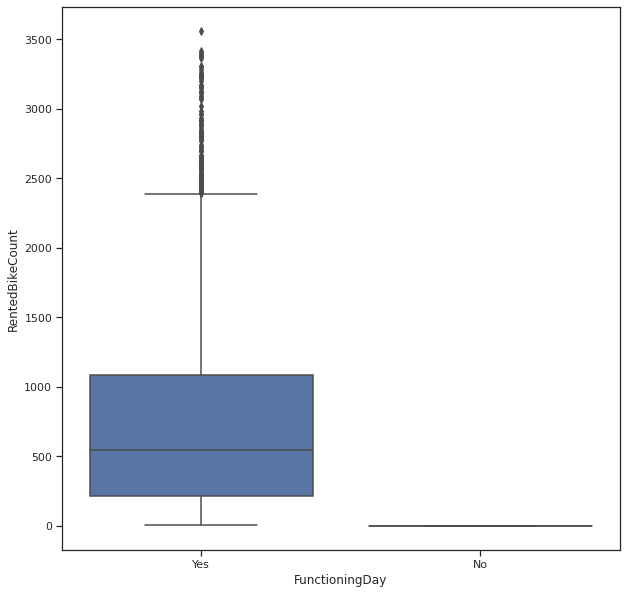

In [ ]:
#ploting box plot of ctaegorical column
for i in cat_feature:
  plt.figure(figsize=(10,10))
  sns.boxplot(x=df[i],y=df['RentedBikeCount'])
  plt.show()



*   **High demand on summer season and low in winter.**
*   **Sligthly high demand during no hilday.**
*   **Zero demand on no functioning day.**





## **Numerical feature**

In [ ]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['RentedBikeCount', 'Hour', 'Temperature', 'Humidity', 'WindSpeed',
       'Visibility', 'DewPointTemperature', 'SolarRadiation', 'Rainfall',
       'Snowfall', 'month', 'weekdays_weekend'],
      dtype='object')

In [ ]:
numeric_features=df.select_dtypes(exclude='object')
numeric_features

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,0


In [ ]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RentedBikeCount      8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   WindSpeed            8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   DewPointTemperature  8760 non-null   float64
 7   SolarRadiation       8760 non-null   float64
 8   Rainfall             8760 non-null   float64
 9   Snowfall             8760 non-null   float64
 10  month                8760 non-null   int64  
 11  weekdays_weekend     8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [ ]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
RentedBikeCount,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
WindSpeed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
DewPointTemperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
SolarRadiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


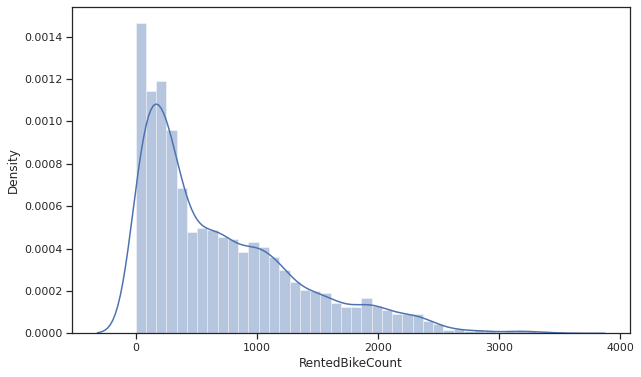

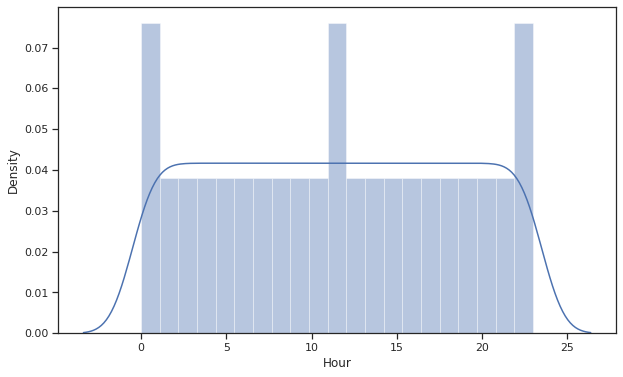

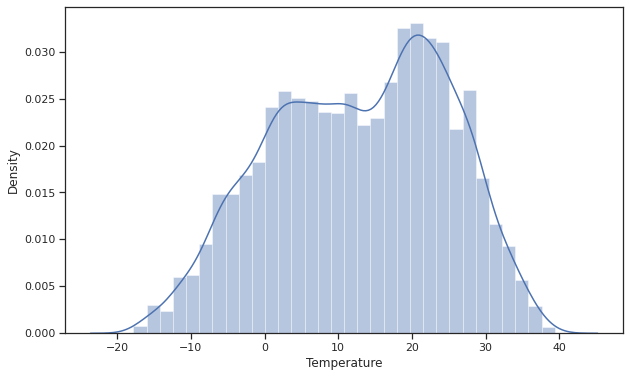

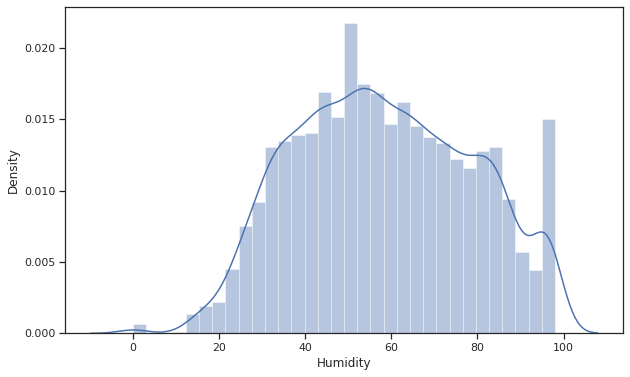

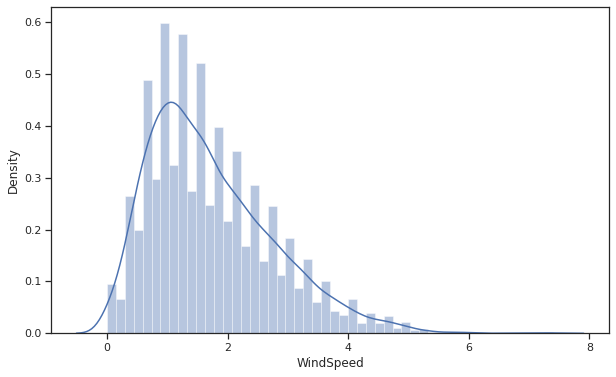

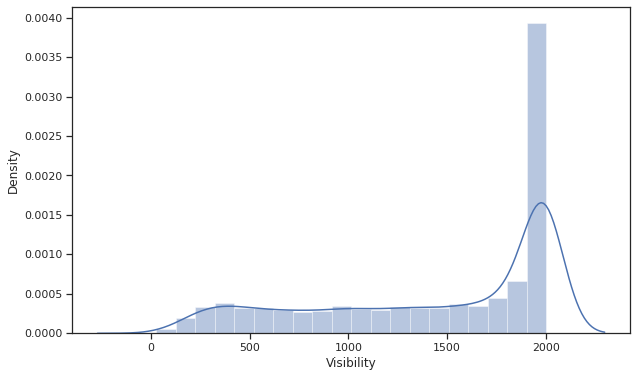

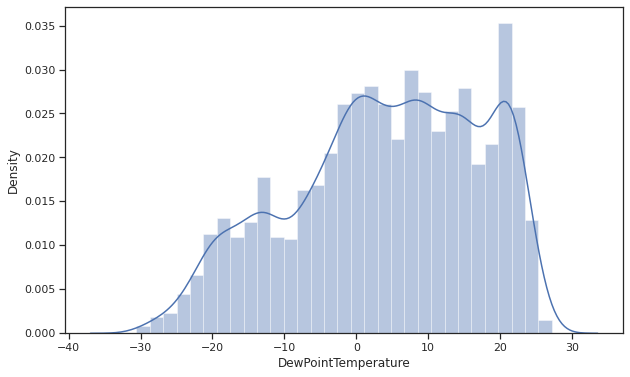

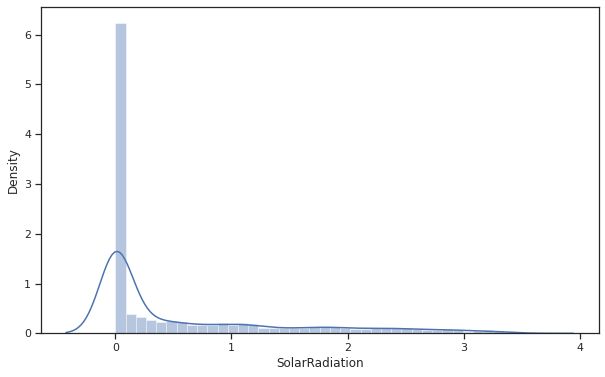

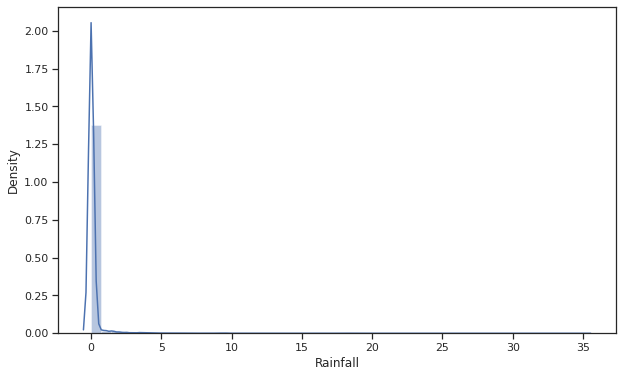

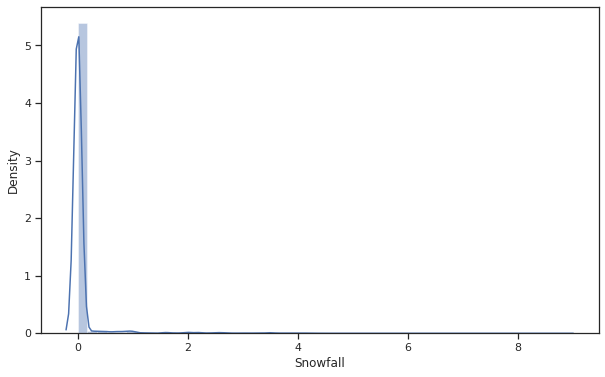

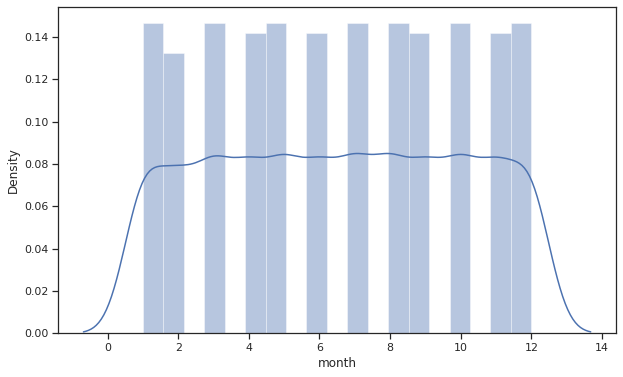

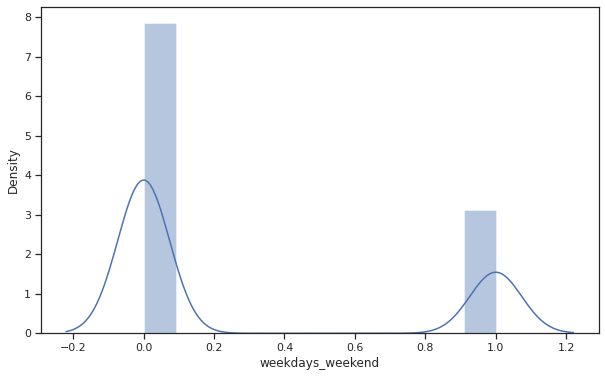

In [ ]:
#plot graph
for col in numeric_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()


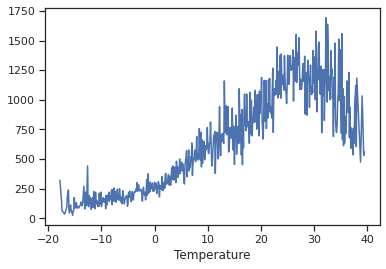

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['RentedBikeCount'].plot()

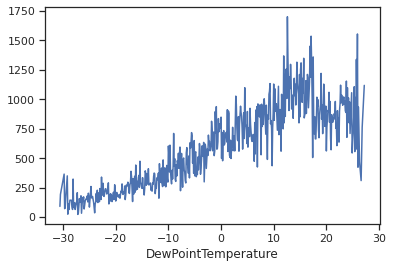

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
df.groupby('DewPointTemperature').mean()['RentedBikeCount'].plot()



*   **We can say that the people like to ride bike during the pretty hot weather, around 30°C.**


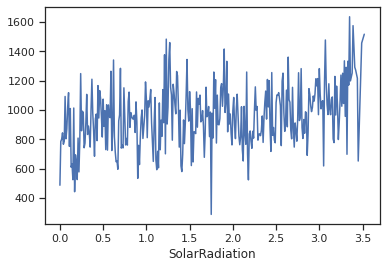

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('SolarRadiation').mean()['RentedBikeCount'].plot()



*   **from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000**



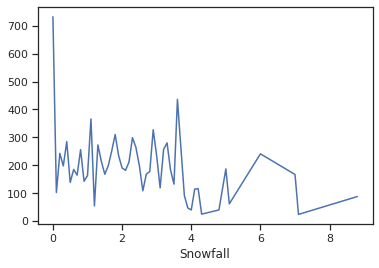

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
df.groupby('Snowfall').mean()['RentedBikeCount'].plot()



*   **Graph shows increase in snowfall demand was decreases.**



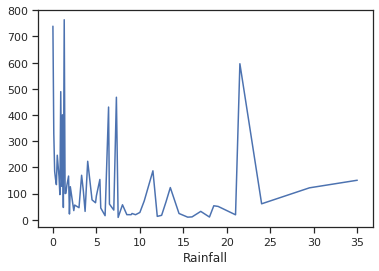

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['RentedBikeCount'].plot()



*   **just like snowfall, when rainfall is increases demand of rented bike is decreases.**



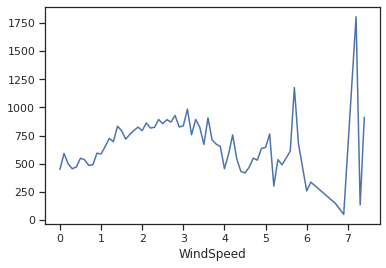

In [ ]:

#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('WindSpeed').mean()['RentedBikeCount'].plot()

**In wind speed plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its littlewindy**

### **Regression plot**

**Regression lines are the best fit of a set of data. You can think of the lines as averages; a few data points will fit the line and others will miss.**

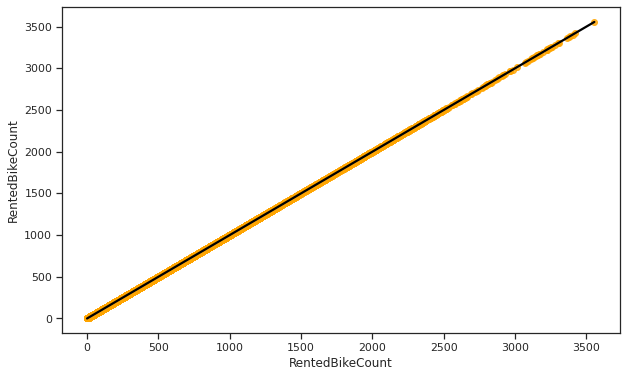

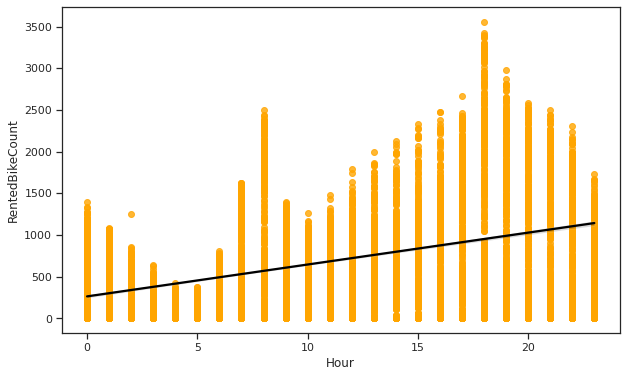

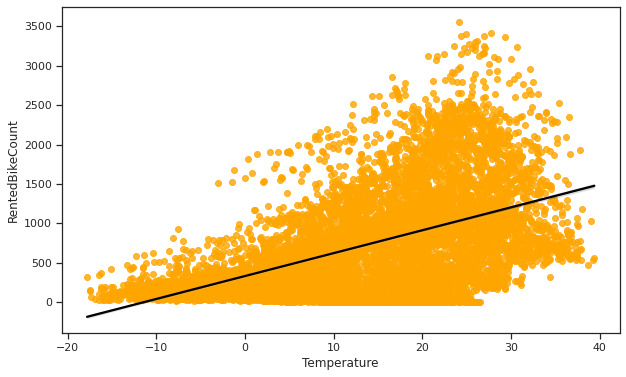

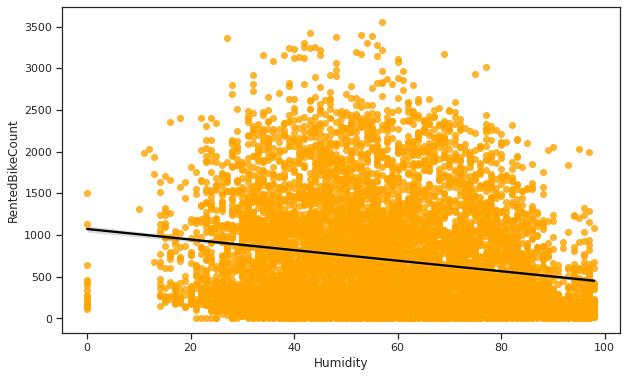

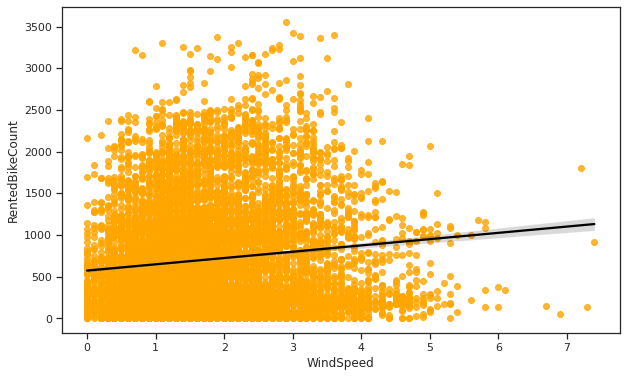

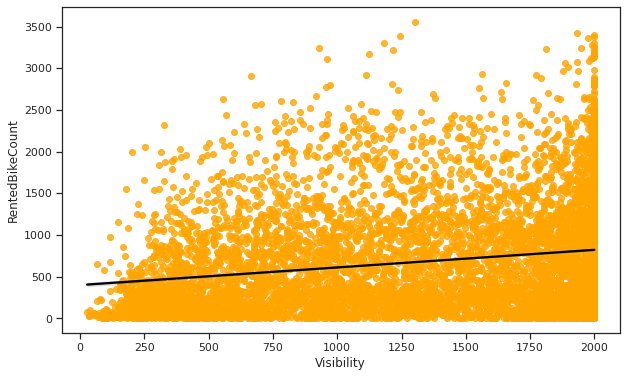

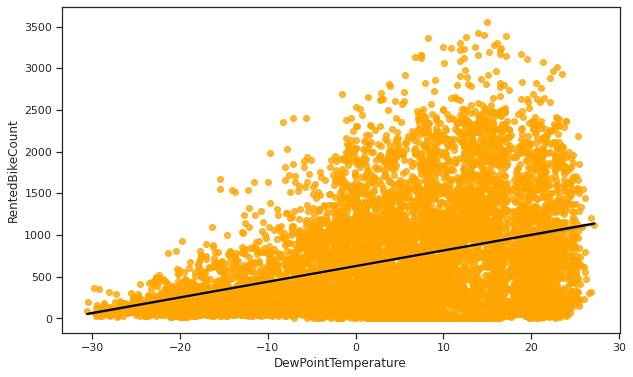

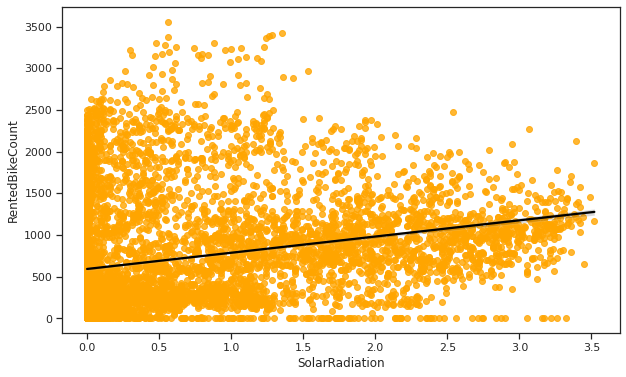

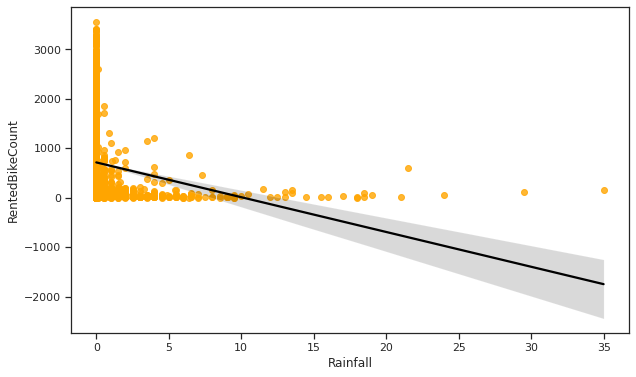

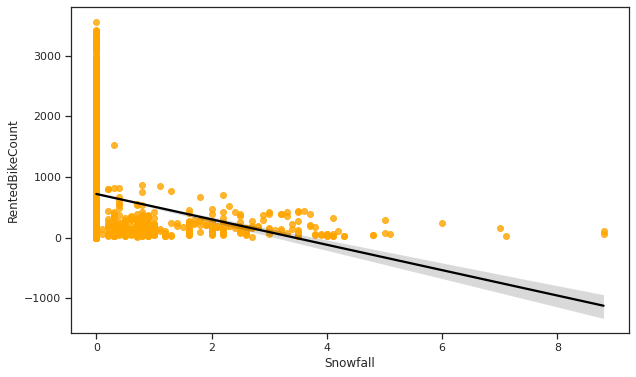

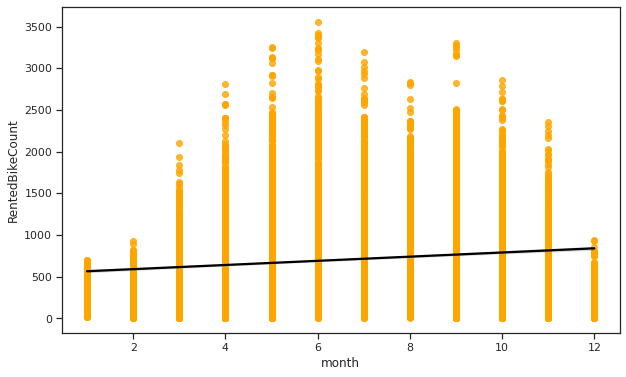

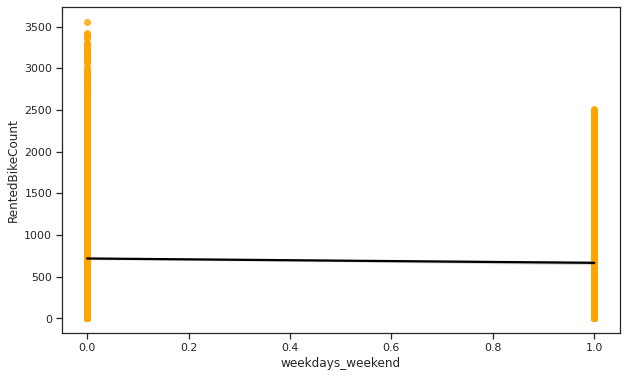

In [ ]:
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['RentedBikeCount'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

*   **From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.**

* **which means the rented bike count increases with increase of these features.**  

*  **'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.** 
 

# **Visulizing distribution**

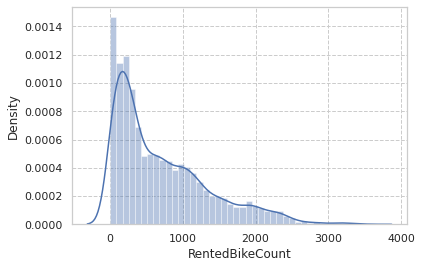

In [ ]:
#Let's visulizing distribution
sns.set_style("whitegrid",{'grid.linestyle': '--'}) # ploting graph in workbook
sns.distplot(df['RentedBikeCount'])

*   **we can see that our graph is positive skewed, means more outliers are right side, so need tansformation.**





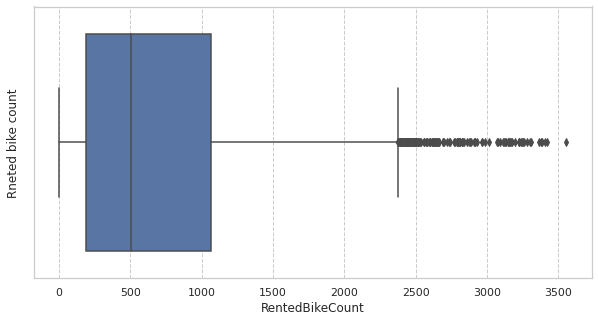

In [ ]:
#lets check for outliers
#for outlier detection we are using box plot
plt.figure(figsize=(10,5))
sns.boxplot(x='RentedBikeCount',data=df)
plt.ylabel('Rneted bike count')
plt.show()

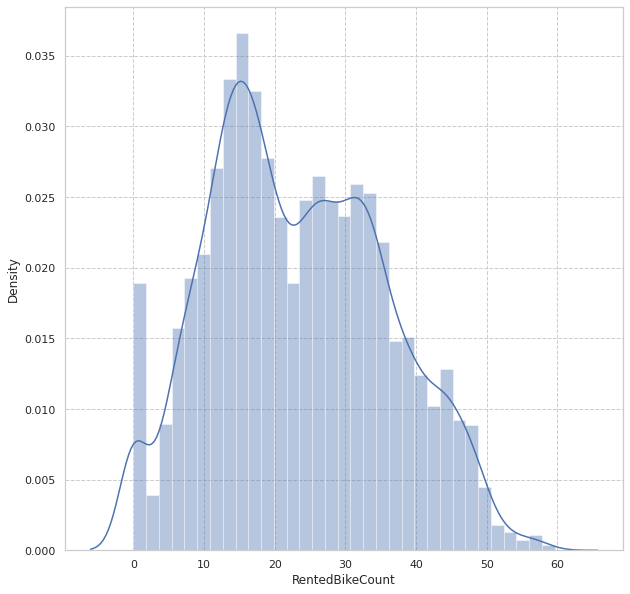

In [ ]:
#here we are using square root transformation
plt.figure(figsize=(10,10))
sns.distplot(np.sqrt(df['RentedBikeCount']))

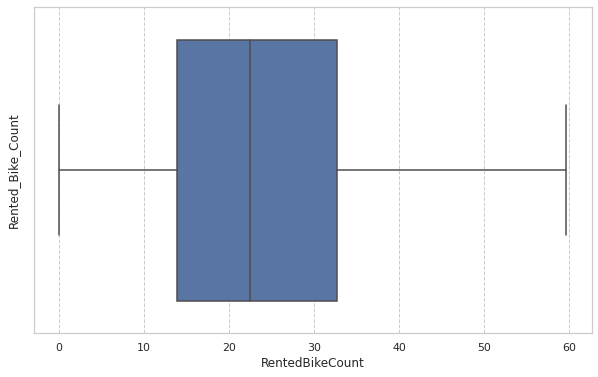

In [ ]:
#ploting boxplot for outliers 
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['RentedBikeCount']))
plt.show()



*   **After applying squrt root transformation there is no outliers present in rented bike count column**


# **Checking for multicolinearity**

In [ ]:
#checking counts on functioning days
df['FunctioningDay'].value_counts()

Yes    8465
No      295
Name: FunctioningDay, dtype: int64

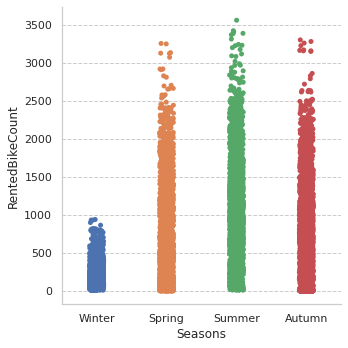

In [ ]:
#graph plot for more understaning
sns.catplot(x='Seasons',y='RentedBikeCount',data=df)

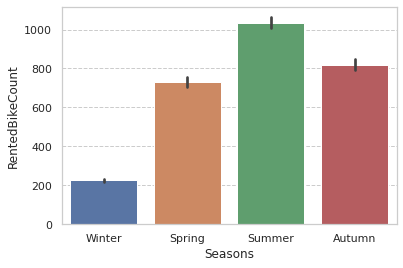

In [ ]:
#graph plot for more info.
sns.barplot(x='Seasons',y='RentedBikeCount',data=df)

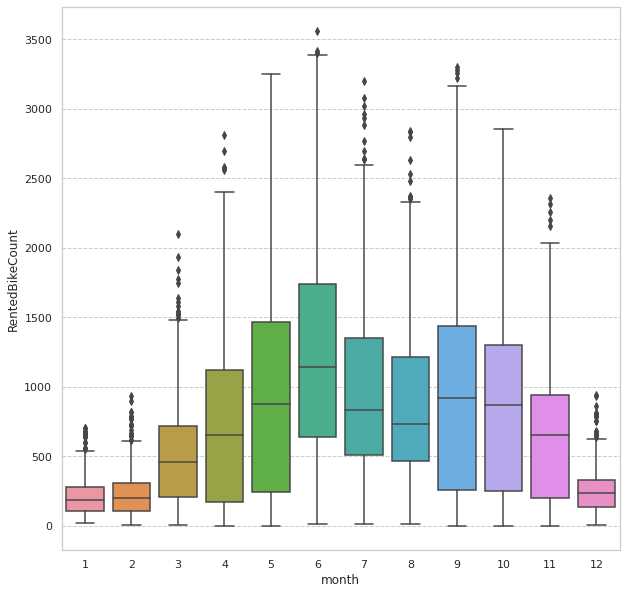

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='month',y='RentedBikeCount',data=df)
plt.show()

* **now it's clear that the in month of december,january,february demand was decreases,means it's a winter season. And in month of may,june,july demand is increases, menas during summer demand is increases.**

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
x = df[[ 'Temperature','Humidity',
       'WindSpeed', 'Visibility','DewPointTemperature',
       'SolarRadiation', 'Rainfall', 'Snowfall']]
Y = df['RentedBikeCount']
df.head()

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#add a constant column
x = sm.add_constant(x)
x

,const,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


**One hot label encoding for categorical columns**

In [ ]:
#Assign all catagoriacla features to a variable
categorical_features=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'FunctioningDay'], dtype='object')

In [ ]:
#creat a copy
df_copy = df.copy()

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,FunctioningDay_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0,0,0,1,1,1


**Checking for multicolinearity**

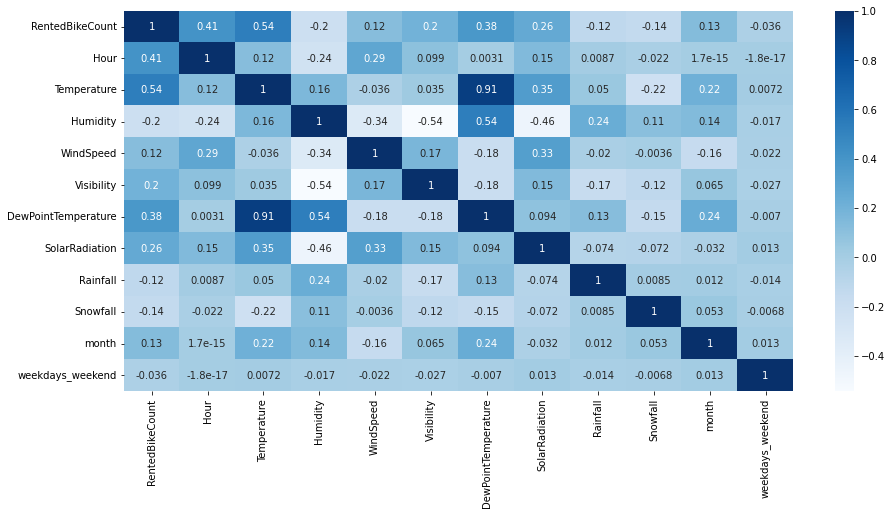

In [ ]:
#checking corealtion using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [ ]:
df_copy.head(2)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,FunctioningDay_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1


# **ML Models Implementation**

**Tarin test split**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.


In [ ]:
# Train - Spliting  data
x=df_copy.drop(['RentedBikeCount'],axis=1)

In [ ]:
x.shape

(8760, 16)

In [ ]:
y=np.sqrt(df_copy['RentedBikeCount'])

In [ ]:
y.shape

(8760,)

In [ ]:
#create train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(6570, 16)
(2190, 16)


In [ ]:
df_copy.head()

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,FunctioningDay_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0,0,0,1,1,1


In [ ]:
x_train.dtypes

Hour                     int64
Temperature            float64
Humidity                 int64
WindSpeed              float64
Visibility               int64
DewPointTemperature    float64
SolarRadiation         float64
Rainfall               float64
Snowfall               float64
month                    int64
weekdays_weekend         int64
Seasons_Spring           uint8
Seasons_Summer           uint8
Seasons_Winter           uint8
Holiday_No Holiday       uint8
FunctioningDay_Yes       uint8
dtype: object

In [ ]:
y_train.dtypes

dtype('float64')

## **Linear Regession Model**

In [ ]:
#importing the package
from sklearn.linear_model import LinearRegression

In [ ]:
#linear regression model
linear_model= LinearRegression()

In [ ]:
#fit the model
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#check the score
linear_model.score(x_train,y_train)


0.656848445414216

In [ ]:
#check the coefficeint
linear_model.coef_

array([ 4.92570643e-01, -1.97819808e-03, -2.96188688e-01,  6.55774060e-02,
       -1.38878539e-04,  5.02043765e-01, -6.40496301e-01, -1.39369178e+00,
        1.83764309e-01,  1.70629926e-01, -1.38473272e+00, -1.96838790e+00,
       -2.53605824e+00, -7.49010589e+00,  3.04648928e+00,  2.83054813e+01])

In [ ]:
y_train_pred=linear_model.predict(x_train)
y_test_pred=linear_model.predict(x_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#Calculate MSE
MSE_lr=mean_squared_error(y_train,y_train_pred)
print("MSE :",MSE_lr)

#Calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#Calculate MAE
MAE_lr=mean_absolute_error(y_train,y_train_pred)
print("MAE :",MAE_lr)

from sklearn.metrics import r2_score

#Calculate r2 score
r2_lr=r2_score(y_train,y_train_pred)
print("R2 :",r2_lr)

#Calculate adjusted_r2 score

adjusted_r2_lr=(1-(1-r2_score(y_train, y_train_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",adjusted_r2_lr)


MSE : 53.39656510174565
RMSE : 7.307295334235893
MAE : 5.608650235369007
R2 : 0.656848445414216
Adjusted R2 : 0.6543217887766769


Looks like our r2 score value is 0.65 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((adjusted_r2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,5.609,53.397,7.307,0.657,0.65


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_test_pred)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_test_pred)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_test_pred))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 51.969197542857664
RMSE : 7.208966468423727
MAE : 5.5449337368940235
R2 : 0.660738066202897
Adjusted R2 : 0.6582400492030104


The r2_score for the test set is 0.66. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

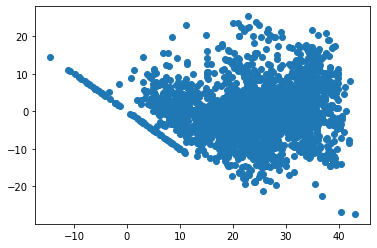

In [ ]:
### Heteroscadacity
plt.scatter((y_test_pred),(y_test)-(y_test_pred))

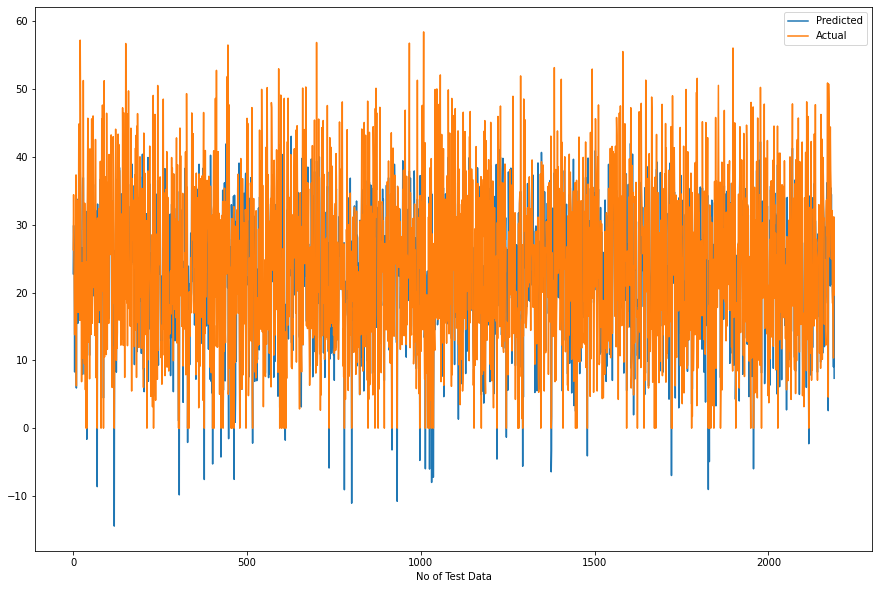

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **LASSO REGRESSION**

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(x_train, y_train)
# Create the model score
print(lasso.score(x_test, y_test), lasso.score(x_train, y_train))


0.4592588036564451 0.47514215795350834


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_l)

MSE : 81.67121948733921
RMSE : 9.037213037620571
MAE : 6.714463134100375
R2 : 0.47514215795350834
Adjusted R2 : 0.4712775811137735


Looks like our r2 score value is 0.47 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_l)

MSE : 82.83241723530892
RMSE : 9.101231632878537
MAE : 6.695468179147453
R2 : 0.4592588036564451
Adjusted R2 : 0.45527727620982894


The r2_score for the test set is 0.45 This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

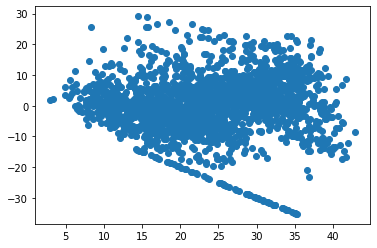

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

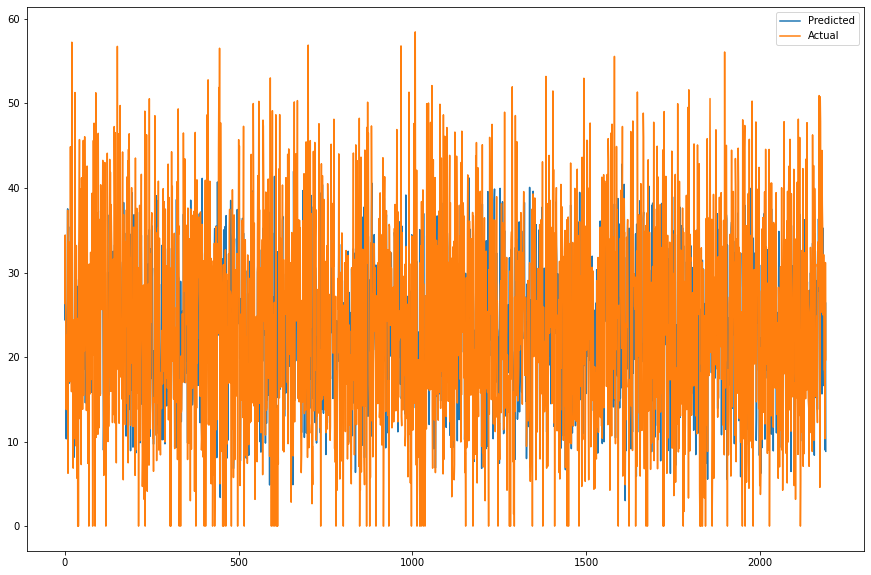

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(x_train, y_train)

0.6568483996593574

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 53.39657222149276
RMSE : 7.307295821402933
MAE : 5.608667022744986
R2 : 0.6568483996593574
Adjusted R2 : 0.654321742684921


Looks like our r2 score value is 0.77 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.609,53.397,7.307,0.657,0.65
1,Lasso regression,6.714,81.671,9.037,0.475,0.47
2,Ridge regression,5.609,53.397,7.307,0.657,0.65


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 51.97020619182089
RMSE : 7.209036426029549
MAE : 5.545003364375157
R2 : 0.6607314816063674
Adjusted R2 : 0.6582334161234875


The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.545,51.969,7.209,0.661,0.66
1,Lasso regression,6.695,82.832,9.101,0.459,0.46
2,Ridge regression,5.545,51.970,7.209,0.661,0.66


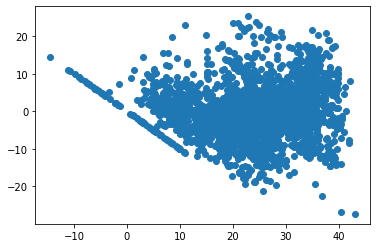

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

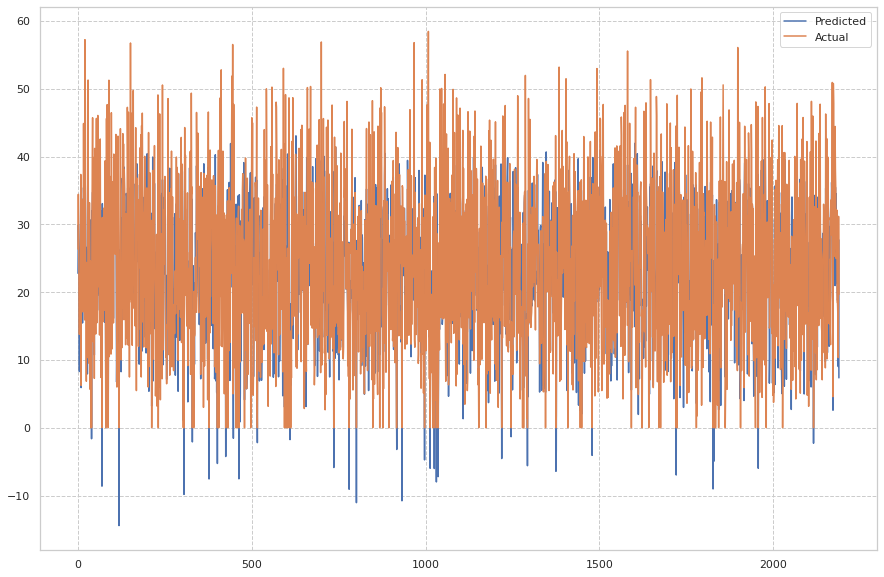

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(x_train)
y_pred_test_d = decision_regressor.predict(x_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(x_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d)

Model Score: 0.8478993907609244
MSE : 23.66782249625263
RMSE : 4.864958632532514
MAE : 3.5017577609055177
R2 : 0.8478993907609244
Adjusted R2 : 0.8467794599059657


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.609,53.397,7.307,0.657,0.65
1,Lasso regression,6.714,81.671,9.037,0.475,0.47
2,Ridge regression,5.609,53.397,7.307,0.657,0.65
3,Dicision tree regression,3.502,23.668,4.865,0.848,0.85


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d)

MSE : 27.205370800338237
RMSE : 5.21587680072471
MAE : 3.7209495415918017
R2 : 0.8223996685771711
Adjusted R2 : 0.8210919809090784


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

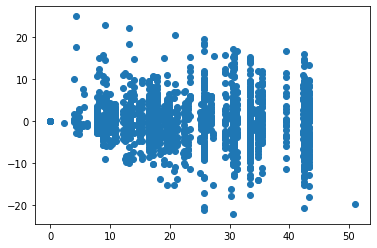

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))


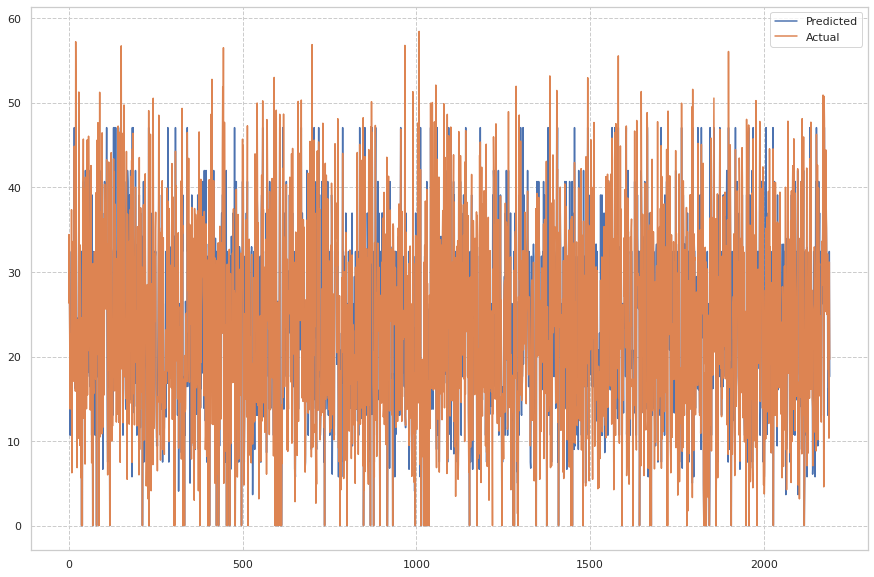

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **ELASTIC NET REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(x_train, y_train)

0.5859249652142559

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(x_train)
y_pred_test_en=elasticnet.predict(x_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )


MSE : 64.43270985216326
RMSE : 8.026998807285526
MAE : 6.095440247072635
R2 : 0.5859249652142559
Adjusted R2 : 0.582876092431664


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 64.58120546973048
RMSE : 8.03624324356415
MAE : 6.0790049362968945
R2 : 0.5784051767099109
Adjusted R2 : 0.5753009350289898


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

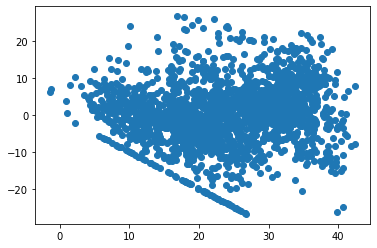

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

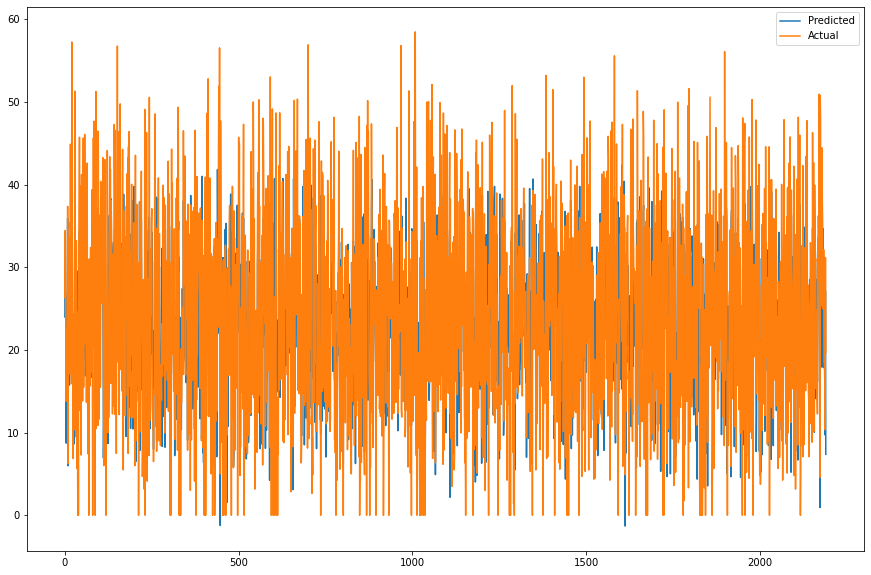

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data
y_pred_train_g = gb_model.predict(x_train)
y_pred_test_g = gb_model.predict(x_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(x_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.9001355144601924
MSE : 15.539549310552909
RMSE : 3.9420235045662664
MAE : 2.821389156564207
R2 : 0.9001355144601924
Adjusted R2 : 0.8994002030158127


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 17.070899205089862
RMSE : 4.1316944714111985
MAE : 2.945146990371217
R2 : 0.8885588666017383
Adjusted R2 : 0.8877383152283503


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

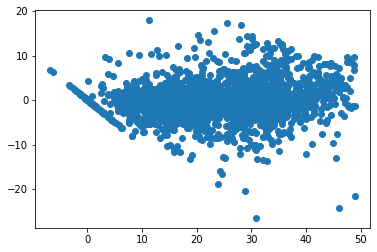

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model.feature_importances_

array([2.42480565e-01, 2.84336631e-01, 1.02242510e-01, 5.07286997e-04,
       3.18948083e-04, 7.21497821e-03, 3.41532163e-02, 6.34744115e-02,
       9.54146177e-04, 2.12401370e-02, 7.98966520e-03, 1.25299649e-04,
       7.81951040e-04, 5.81751234e-02, 2.25495767e-03, 1.73750173e-01])

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Hour,0.24
1,Temperature,0.28
2,Humidity,0.10
3,WindSpeed,0.00
4,Visibility,0.00


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.28
0,Hour,0.24
15,FunctioningDay_Yes,0.17
2,Humidity,0.10
7,Rainfall,0.06
13,Seasons_Winter,0.06
6,SolarRadiation,0.03
9,month,0.02
5,DewPointTemperature,0.01
10,weekdays_weekend,0.01


In [ ]:
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = x_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

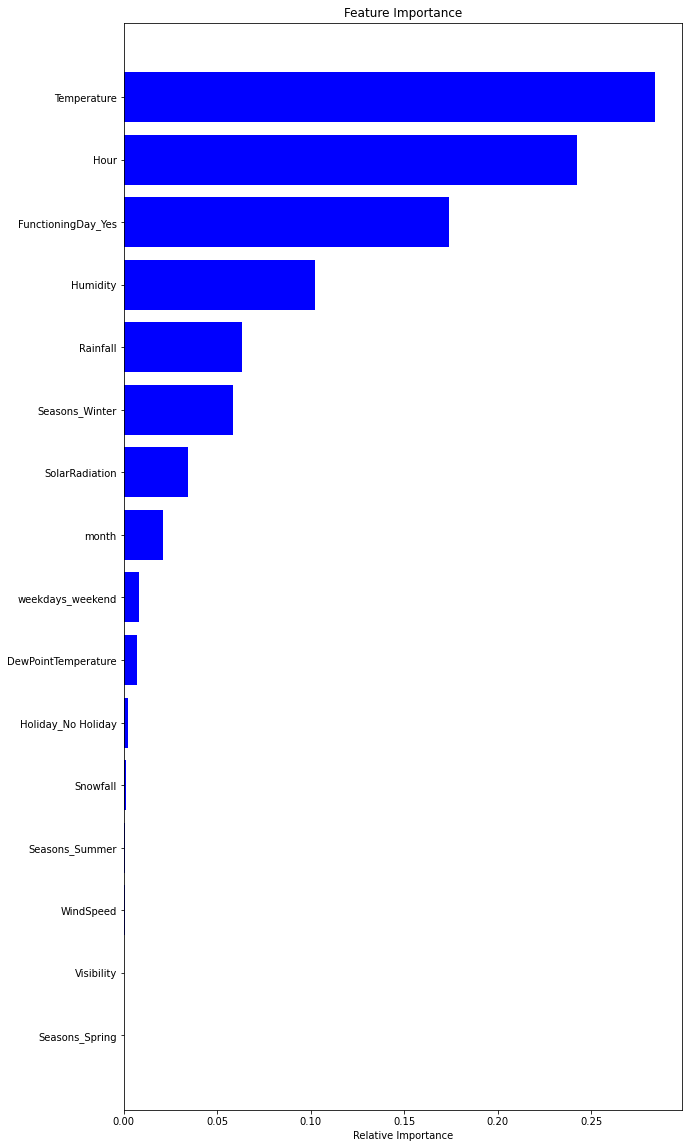

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Hyperparameter tuning**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

**Importing Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(x_train)
y_pred_g_g= gb_optimal_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(x_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.9698805548503179
MSE : 4.686777292047521
RMSE : 2.164896600775086
MAE : 1.4521837526587853
R2 : 0.9698805548503179
Adjusted R2 : 0.9696587825896668


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 9.002970778487384
RMSE : 3.0004950888957285
MAE : 1.8718349839235973
R2 : 0.9412273919813832
Adjusted R2 : 0.9407946438321435


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

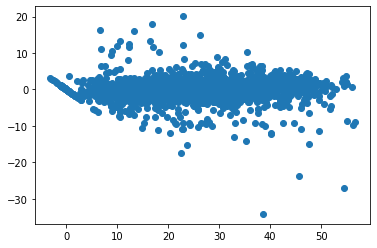

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

array([0.24472057, 0.27302745, 0.11224672, 0.00324331, 0.00404184,
       0.01427391, 0.0385606 , 0.05988758, 0.00125613, 0.02006278,
       0.02217282, 0.00097376, 0.00181607, 0.0474048 , 0.00226834,
       0.15404332])

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Hour,0.24
1,Temperature,0.27
2,Humidity,0.11
3,WindSpeed,0.00
4,Visibility,0.00


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.27
0,Hour,0.24
15,FunctioningDay_Yes,0.15
2,Humidity,0.11
7,Rainfall,0.06
13,Seasons_Winter,0.05
6,SolarRadiation,0.04
9,month,0.02
10,weekdays_weekend,0.02
5,DewPointTemperature,0.01


In [ ]:
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = x_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

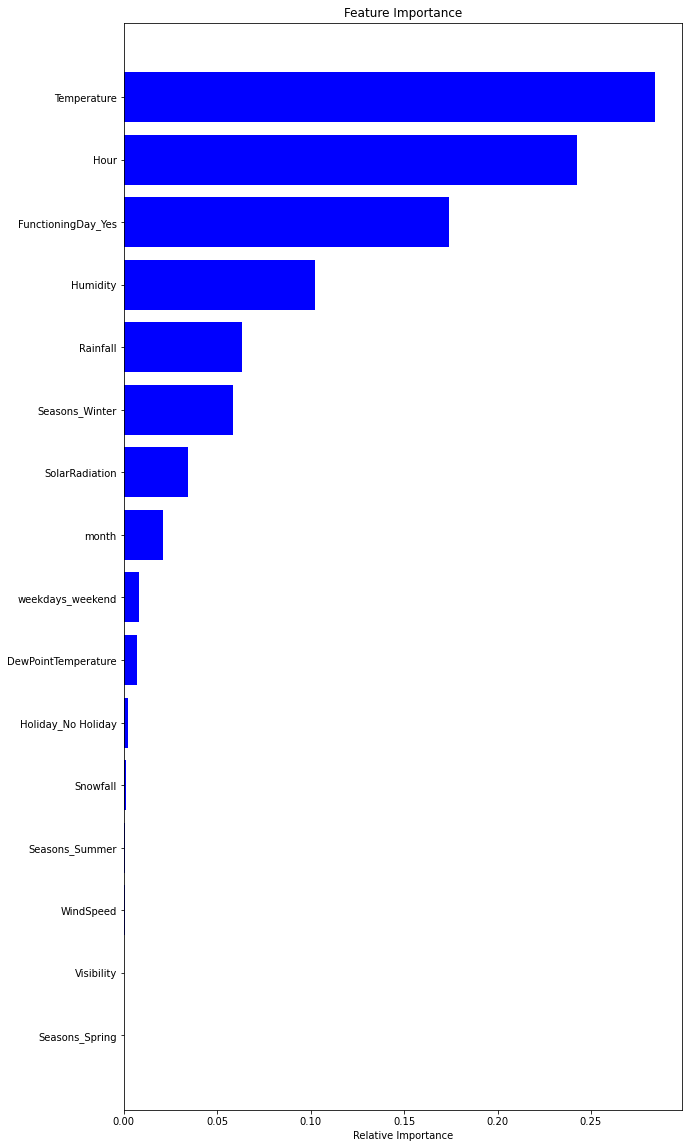

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **CONCLUSION**

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   5.609  53.397  7.307   
             1                Lasso regression   6.714  81.671  9.037   
             2                Ridge regression   5.609  53.397  7.307   
             3        Dicision tree regression   3.502  23.668  4.865   
             4          Elastic net regression   6.095  64.433  8.027   
             5    Gradient boosting regression   2.821  15.540  3.942   
             6  Gradient Boosting gridsearchcv   1.452   4.687  2.165   
Test set     0               Linear regression   5.545  51.969  7.209   
             1                Lasso regression   6.695  82.832  9.101   
             2                Ridge regression   5.545  51.970  7.209   
             3        Dicision tree regression   3.721  27.205  5.216   
             4      Elastic net regression Test  6.079  64.581  8.036   
             5    Gradient boosting regression   2.945  17.071  4.132   
             6  Gradient Boosting gridsearchcv   1.872   9.003  3.000   

                R2_score  Adjusted R2  
Training set 0     0.657         0.65  
             1     0.475         0.47  
             2     0.657         0.65  
             3     0.848         0.85  
             4     0.586         0.58  
             5     0.900         0.90  
             6     0.970         0.97  
Test set     0     0.661         0.66  
             1     0.459         0.46  
             2     0.661         0.66  
             3     0.822         0.82  
             4     0.578         0.58  
             5     0.889         0.89  
             6     0.941         0.94